In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

EDA 

target: AMT_CREDIT 


How much loan amount a user is likely to request based on their profile.

In [2]:
df=pd.read_csv('../data/final/final.csv')

In [3]:
df.shape

(264374, 47)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-20,1.000000,179055.00,1,0,1,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-7,1.000000,435436.50,3,0,3,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-7,1.000000,24282.00,1,0,1,0.0,0.0,0.0,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3,0.954545,150530.25,6,0,6,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,26,0.971429,155701.80,4,1,5,0.0,0.0,0.0,0.0


In [5]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
109304,247321,0,Cash loans,F,N,Y,0,90000.0,594000.0,17496.0,...,-16,0.953125,119700.00,5,5,10,0.0,0.0,0.0,0.0
51084,168795,1,Cash loans,F,N,Y,0,54000.0,177768.0,11502.0,...,0,1.000000,52374.45,1,2,3,0.0,0.0,0.0,0.0
244800,429804,1,Cash loans,F,N,Y,0,40500.0,101880.0,5688.0,...,-16,1.000000,84030.00,1,2,3,0.0,0.0,0.0,0.0
238830,421852,0,Cash loans,F,N,N,0,112500.0,1009566.0,36391.5,...,-12,1.000000,527661.00,1,0,1,0.0,0.0,0.0,0.0
60590,181596,0,Cash loans,F,N,Y,0,247500.0,497520.0,33376.5,...,-4,0.962963,156143.25,3,1,4,0.0,0.0,0.0,0.0


In [6]:
df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
ORGANIZATION_TYPE                   0
EXT_SOURCE_2                        0
OBS_30_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_60_CNT_SOCIAL_CIRCLE            0
DAYS_LAST_PHONE_CHANGE              0
AMT_REQ_CRED

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264374 entries, 0 to 264373
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SK_ID_CURR                        264374 non-null  int64  
 1   TARGET                            264374 non-null  int64  
 2   NAME_CONTRACT_TYPE                264374 non-null  object 
 3   CODE_GENDER                       264374 non-null  object 
 4   FLAG_OWN_CAR                      264374 non-null  object 
 5   FLAG_OWN_REALTY                   264374 non-null  object 
 6   CNT_CHILDREN                      264374 non-null  int64  
 7   AMT_INCOME_TOTAL                  264374 non-null  float64
 8   AMT_CREDIT                        264374 non-null  float64
 9   AMT_ANNUITY                       264374 non-null  float64
 10  AMT_GOODS_PRICE                   264374 non-null  float64
 11  NAME_INCOME_TYPE                  264374 non-null  o

In [8]:

num_cols = df.select_dtypes(include=['int64', 'float64'])

zero_counts =((num_cols == 0).sum() / len(df)) * 100

print("Number of zeros in each numeric column:")
print(zero_counts)


Number of zeros in each numeric column:
SK_ID_CURR                           0.000000
TARGET                              92.265124
CNT_CHILDREN                        69.671753
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.000000
AMT_GOODS_PRICE                      0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000757
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT                 0.000000
EXT_SOURCE_2                         0.000000
OBS_30_CNT_SOCIAL_CIRCLE            53.188665
DEF_30_CNT_SOCIAL_CIRCLE            88.505678
OBS_60_CNT_SOCIAL_CIRCLE            53.439067
DEF_60_CNT_SOCIAL_CIRCLE            91.609992
DAYS_LAST_PHONE_CHANGE              11.936499
AMT_REQ_CREDIT_BUREAU_HOUR          99.389123
AMT_REQ_CREDIT_BUREAU_DAY           99.439052
AMT_REQ_CREDIT_BUREAU_WEEK          96.783345
AMT_REQ_CREDIT_BUREAU_MON           83.5

In [9]:
df.nunique()

SK_ID_CURR                          264374
TARGET                                   2
NAME_CONTRACT_TYPE                       2
CODE_GENDER                              3
FLAG_OWN_CAR                             2
FLAG_OWN_REALTY                          2
CNT_CHILDREN                            15
AMT_INCOME_TOTAL                      2184
AMT_CREDIT                            5265
AMT_ANNUITY                          13193
AMT_GOODS_PRICE                        840
NAME_INCOME_TYPE                         8
NAME_EDUCATION_TYPE                      5
NAME_FAMILY_STATUS                       5
NAME_HOUSING_TYPE                        6
DAYS_BIRTH                           17399
DAYS_EMPLOYED                        12383
CNT_FAM_MEMBERS                         17
REGION_RATING_CLIENT                     3
ORGANIZATION_TYPE                       58
EXT_SOURCE_2                        111827
OBS_30_CNT_SOCIAL_CIRCLE                33
DEF_30_CNT_SOCIAL_CIRCLE                10
OBS_60_CNT_

In [10]:

corr_matrix = df.corr(numeric_only=True).abs()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column1', 'Column2', 'Correlation'])
display(high_corr_df)

,Column1,Column2,Correlation
0,CNT_CHILDREN,CNT_FAM_MEMBERS,0.880927
1,AMT_CREDIT,AMT_GOODS_PRICE,0.986871
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998512
3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.859579
4,pos_num_loans,prev_num_approved,0.951686
5,prev_num_rejected,prev_num_applications,0.867015


In [11]:
df.drop(columns=['CNT_CHILDREN', 'AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'prev_num_applications','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT'], inplace=True, errors='ignore')

univarte_plots Numeric

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['SK_ID_CURR', 'TARGET'], errors='ignore')

In [13]:
summary_stats = df[num_cols].describe().T
summary_stats['median'] = df[num_cols].median()
summary_stats['skew'] = df[num_cols].skew()
display(summary_stats.head())

,count,mean,std,min,25%,50%,75%,max,median,skew
AMT_INCOME_TOTAL,264374.0,171223.837943,248890.383987,26100.0,112500.0,157500.0,202500.0,117000000.0,157500.0,391.790111
AMT_CREDIT,264374.0,607428.377006,405077.284998,45000.0,273636.0,521280.0,814041.0,4050000.0,521280.0,1.216126
AMT_ANNUITY,264374.0,27212.738286,14382.636782,1615.5,16681.5,25029.0,34780.5,258025.5,25029.0,1.540111
DAYS_BIRTH,264374.0,-16116.352588,4308.348420,-25201.0,-19713.0,-15811.0,-12569.0,-7489.0,-15811.0,-0.117240
DAYS_EMPLOYED,264374.0,63515.981416,141097.152091,-17912.0,-2846.0,-1264.0,-303.0,365243.0,-1264.0,1.670204


In [15]:
num_cols_parts = np.array_split(num_cols, 4)

part1, part2, part3, part4 = num_cols_parts

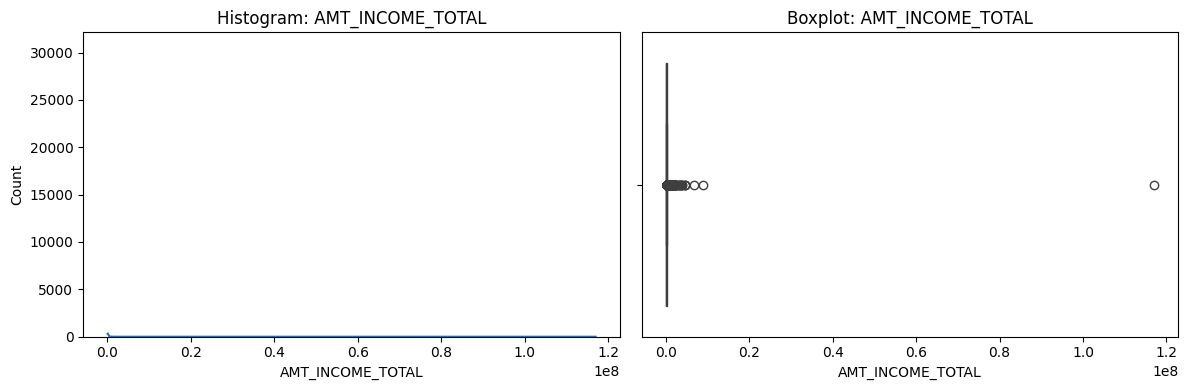

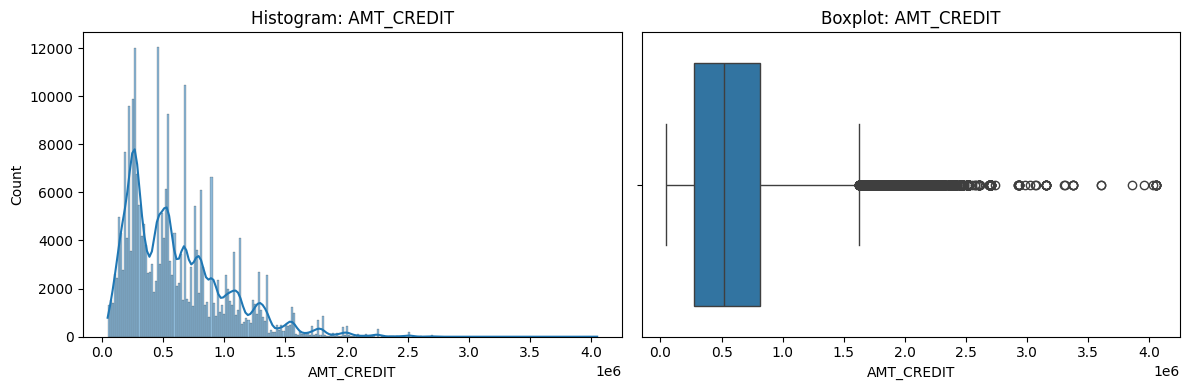

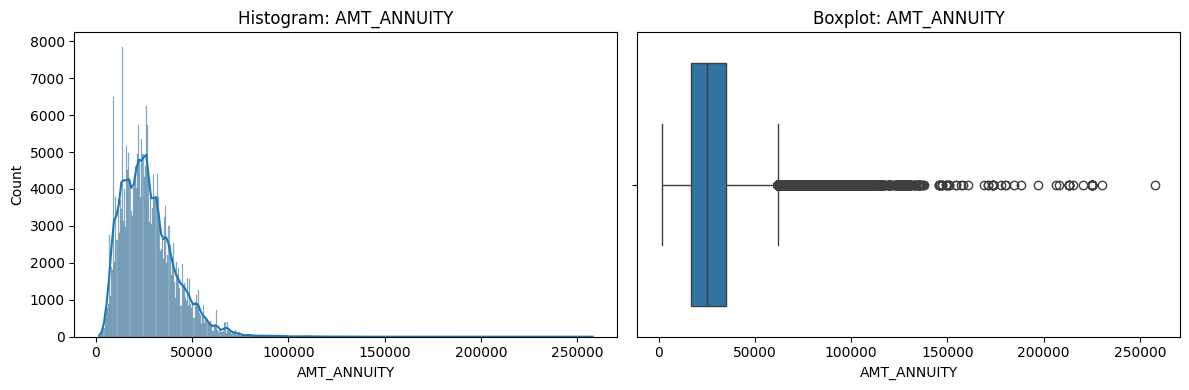

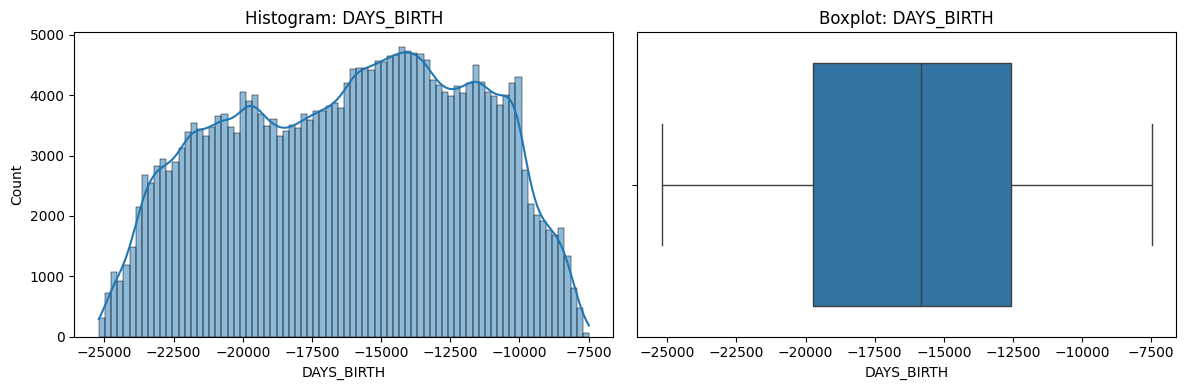

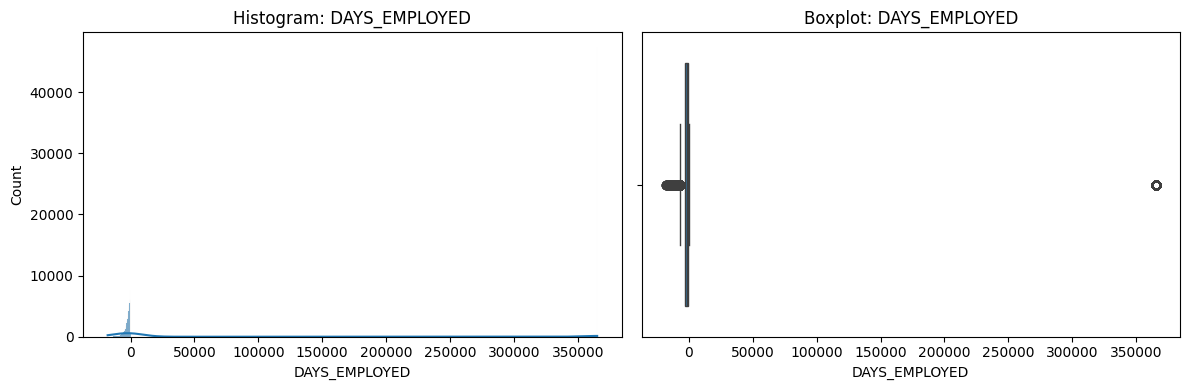

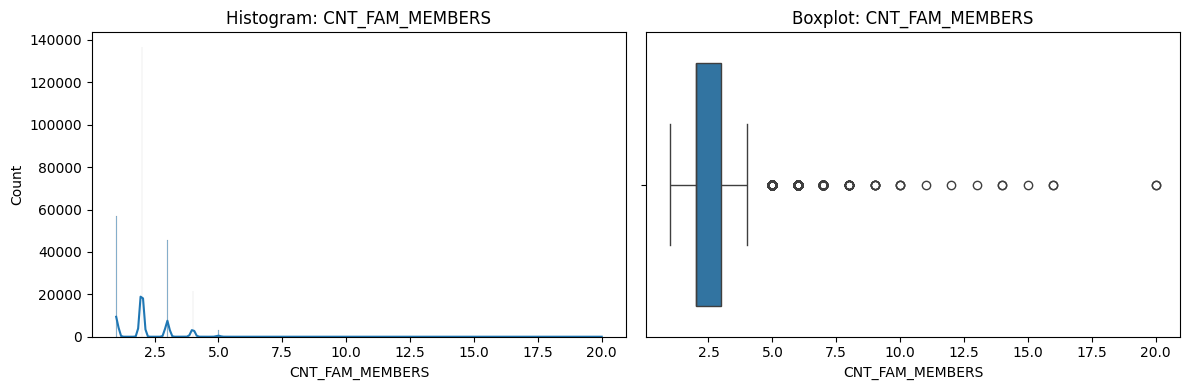

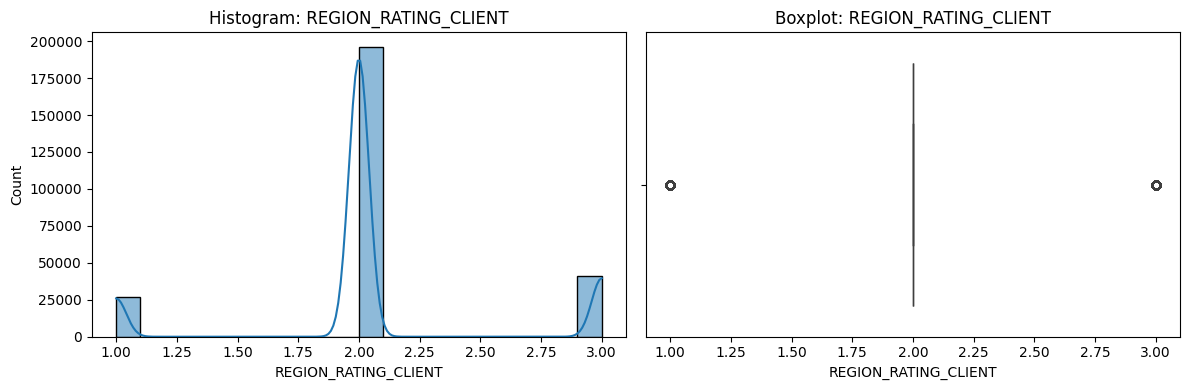

In [16]:
for col in part1:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

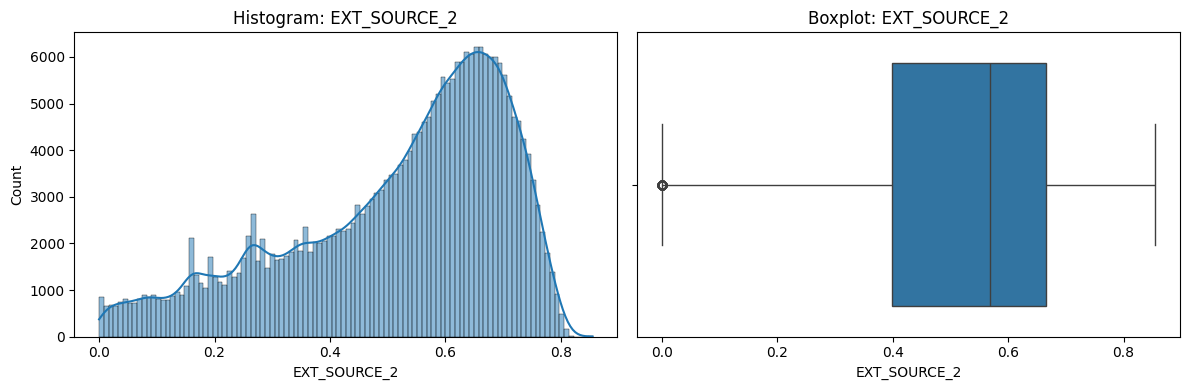

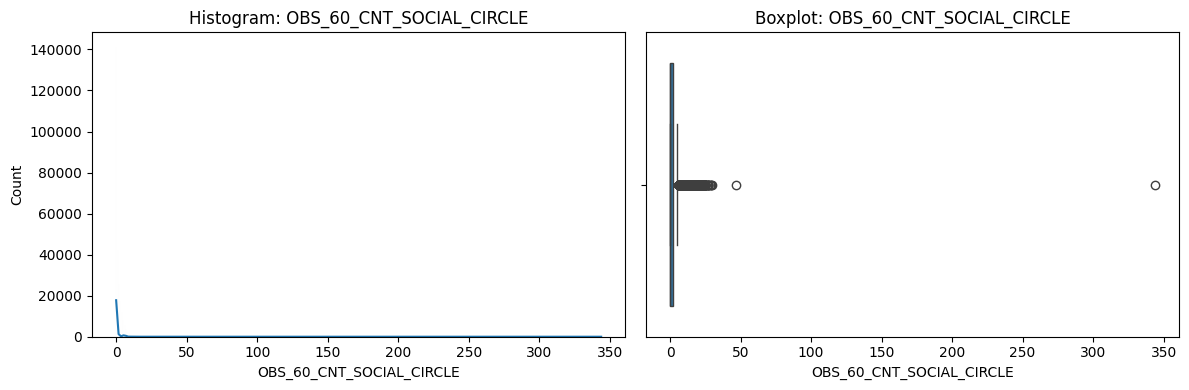

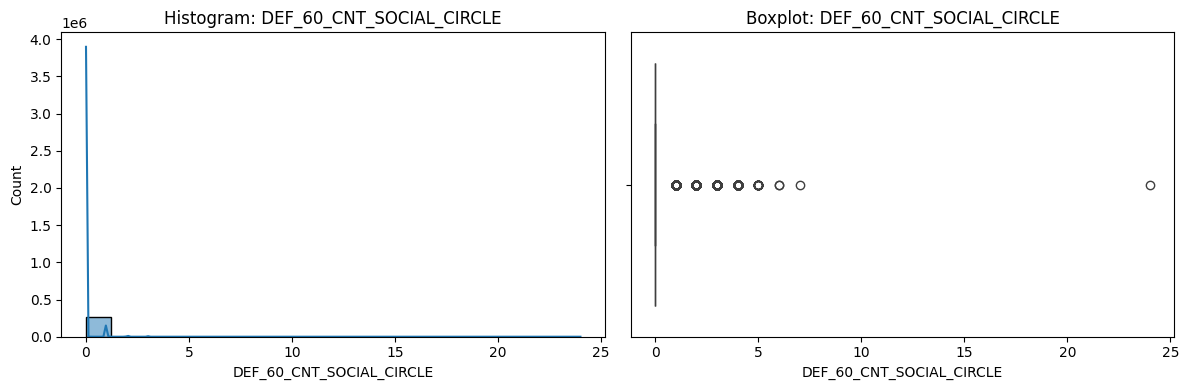

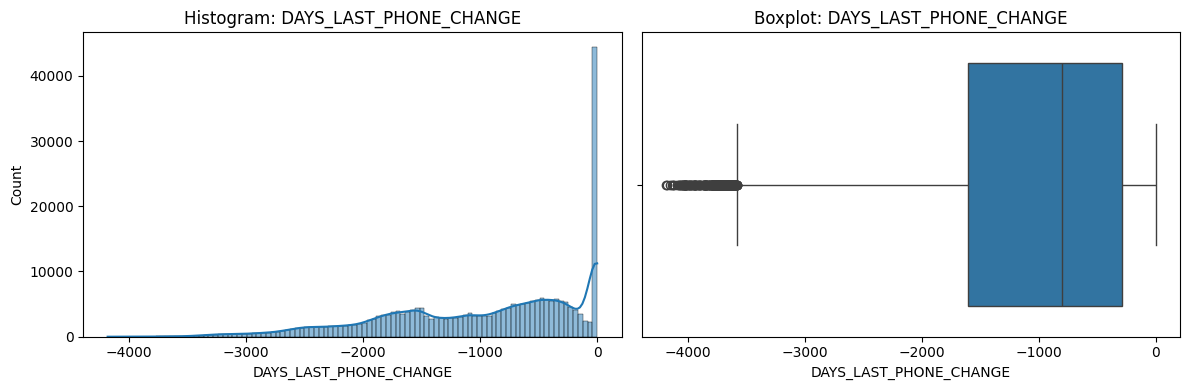

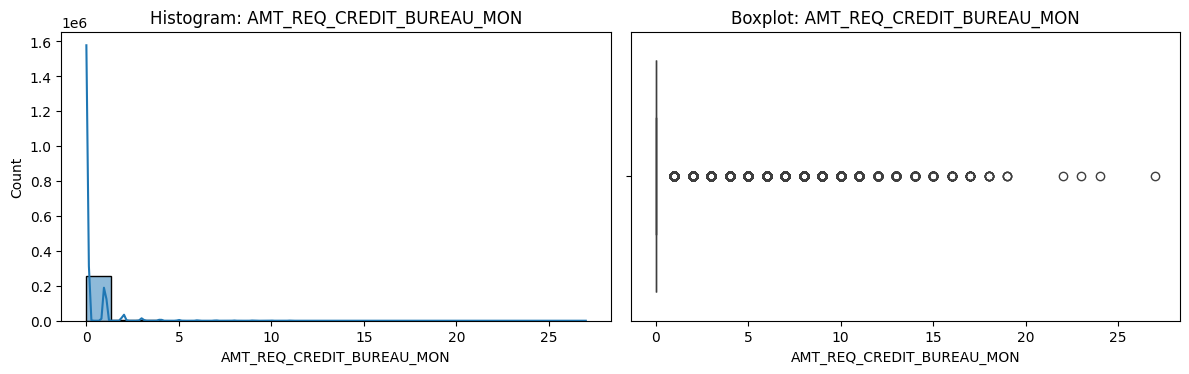

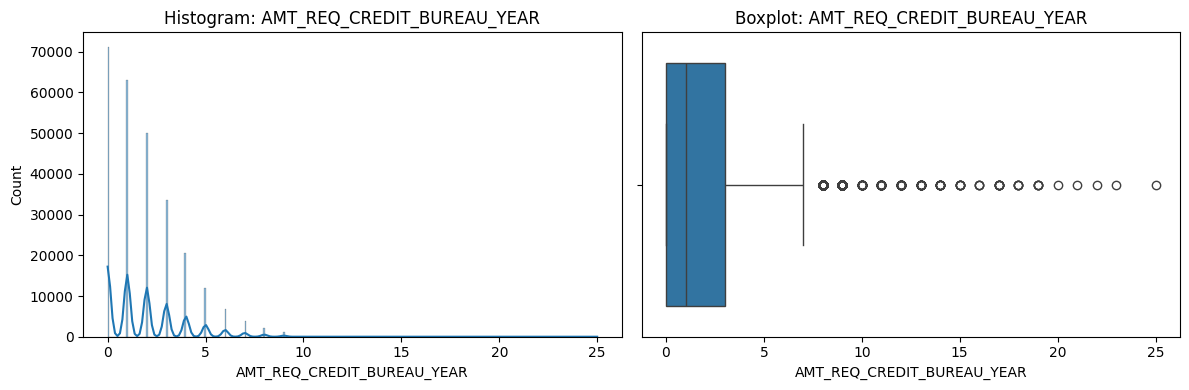

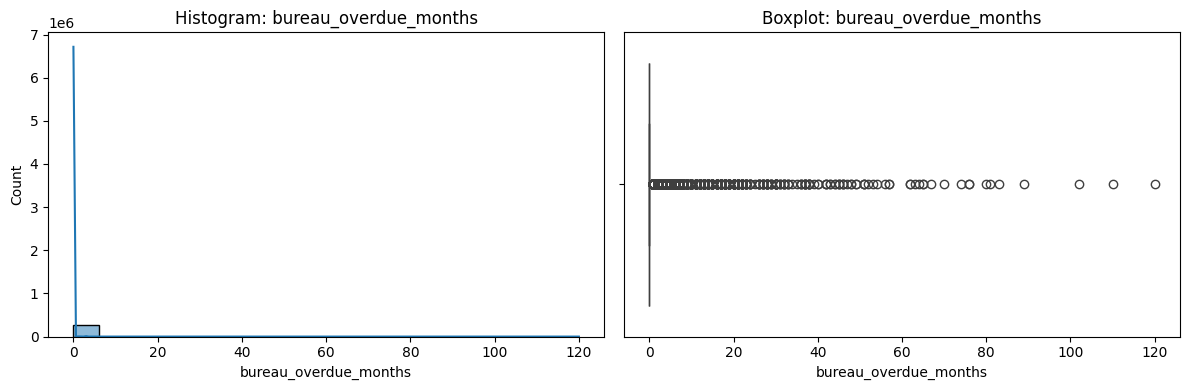

In [17]:
for col in part2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

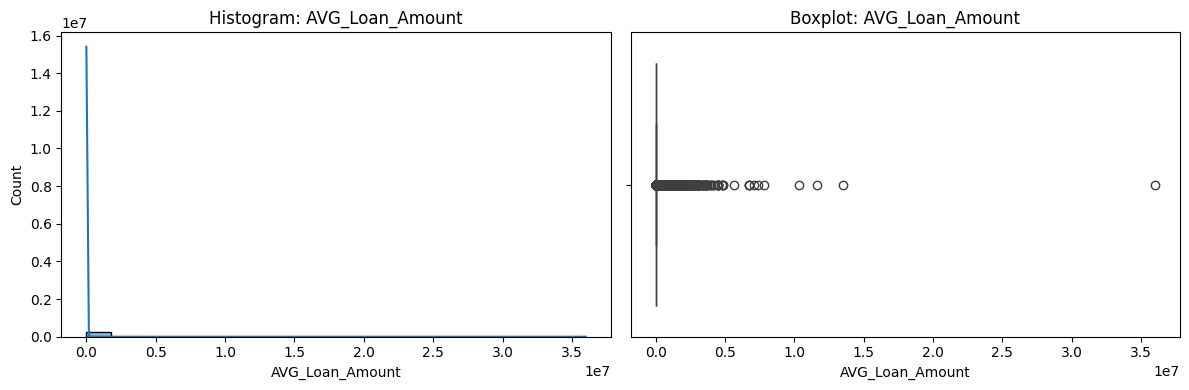

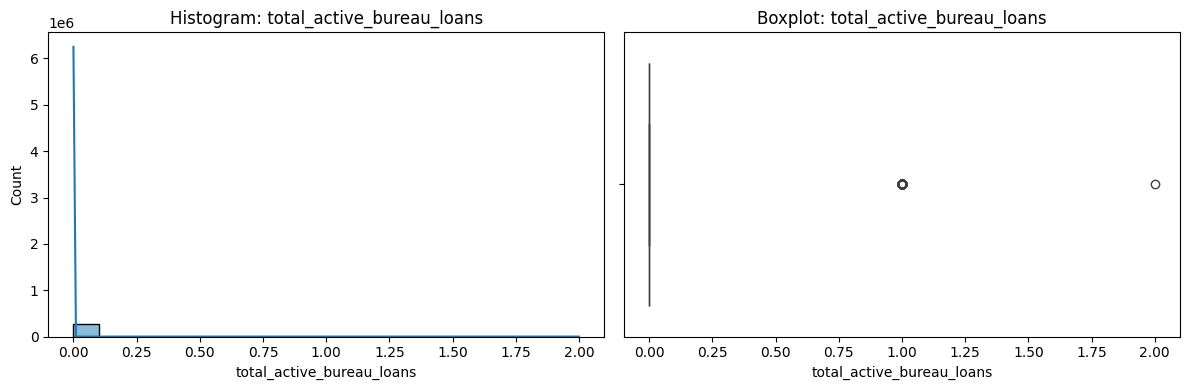

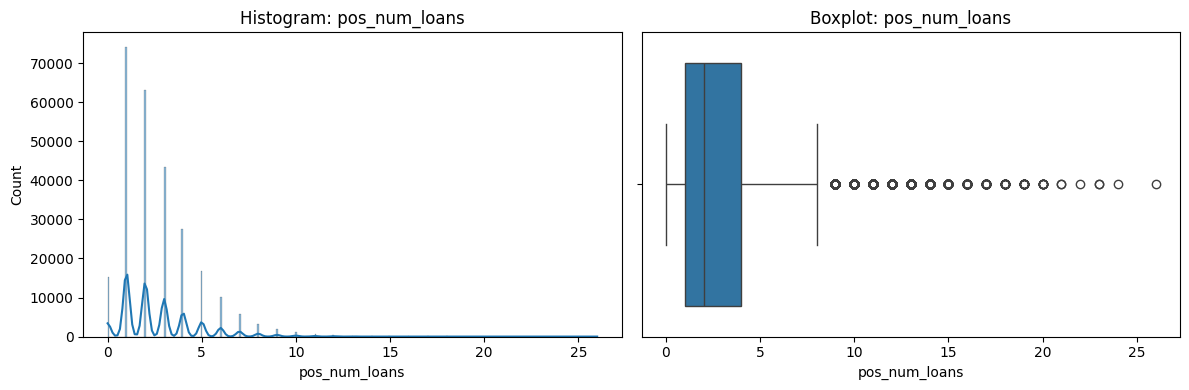

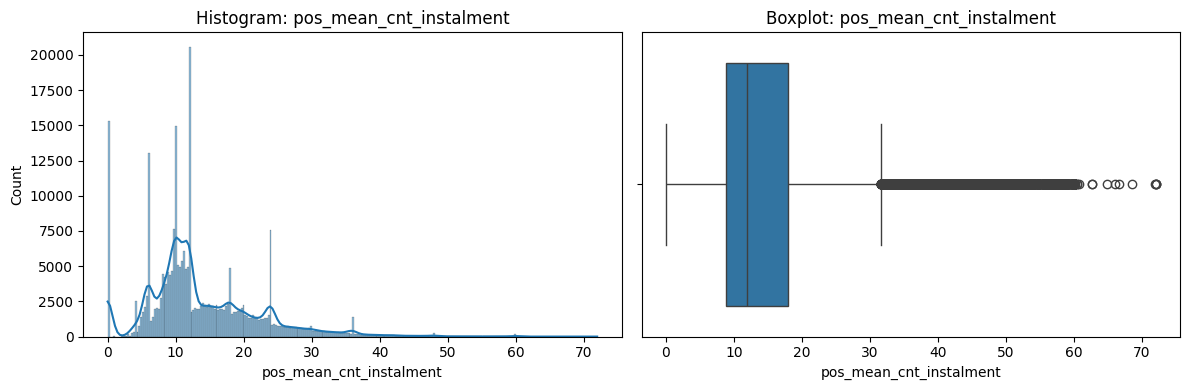

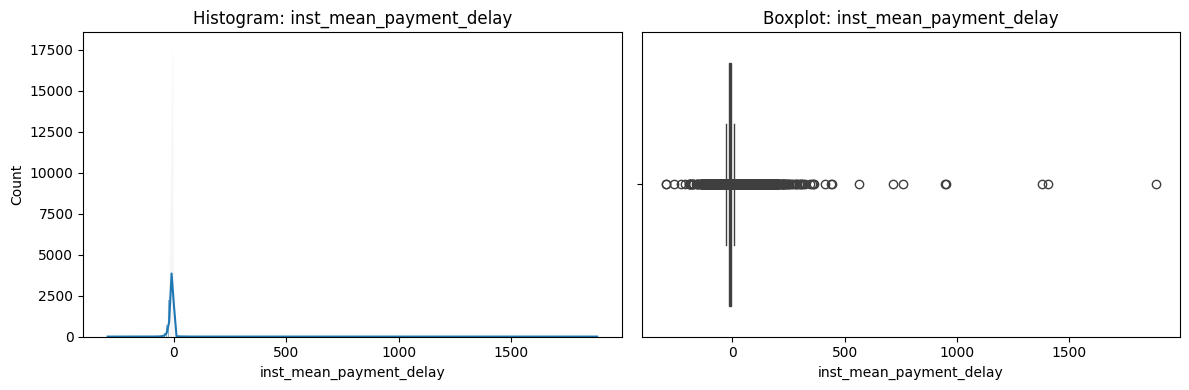

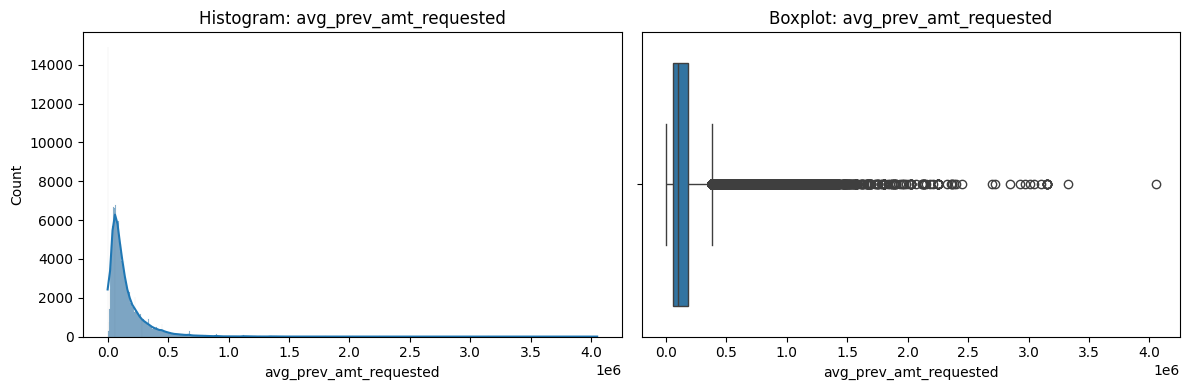

In [22]:
for col in [c for c in part3 if c != 'inst_mean_payment_rate']:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

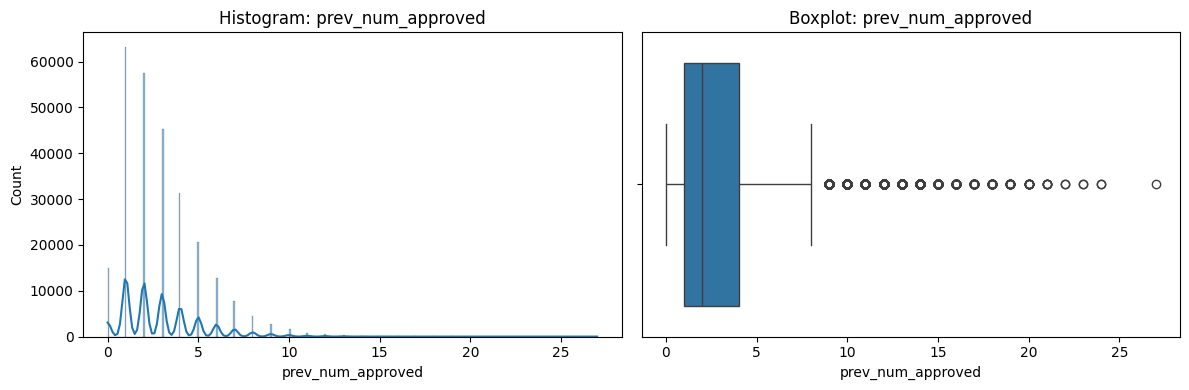

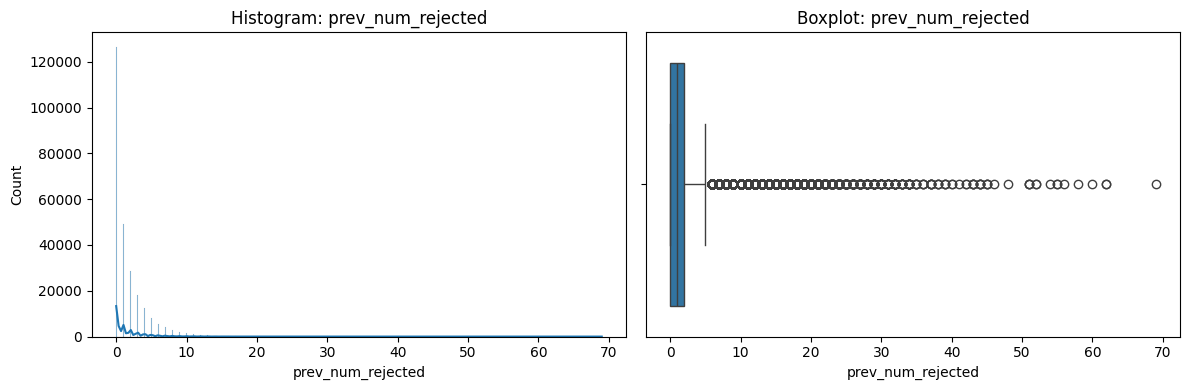

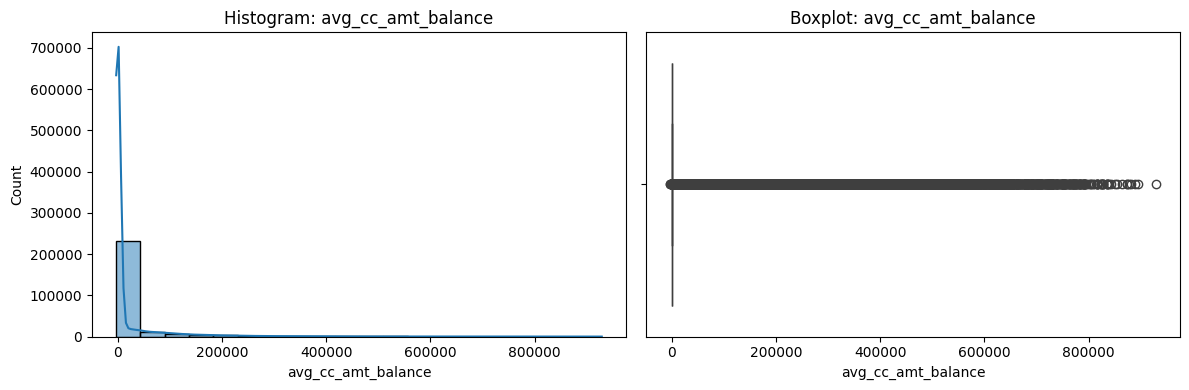

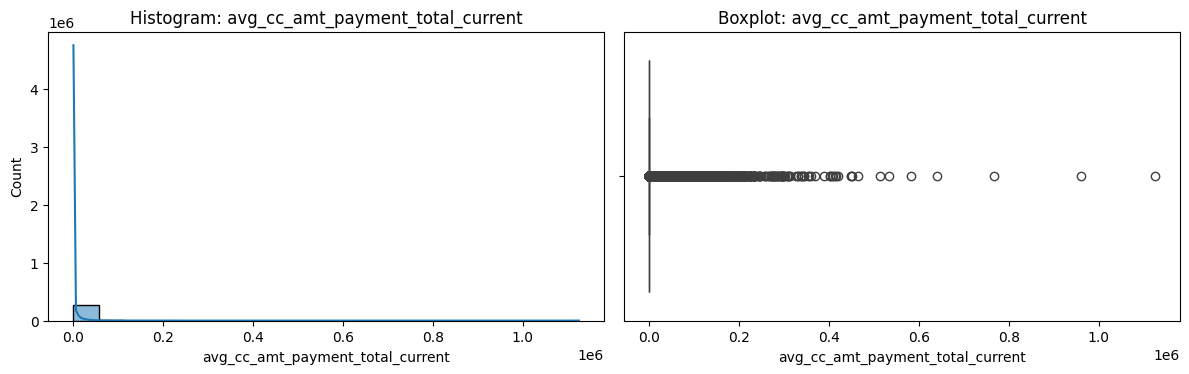

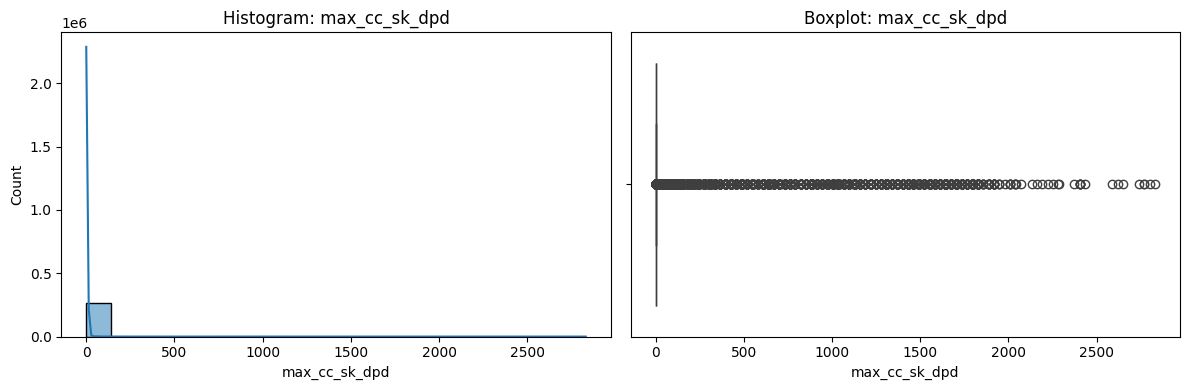

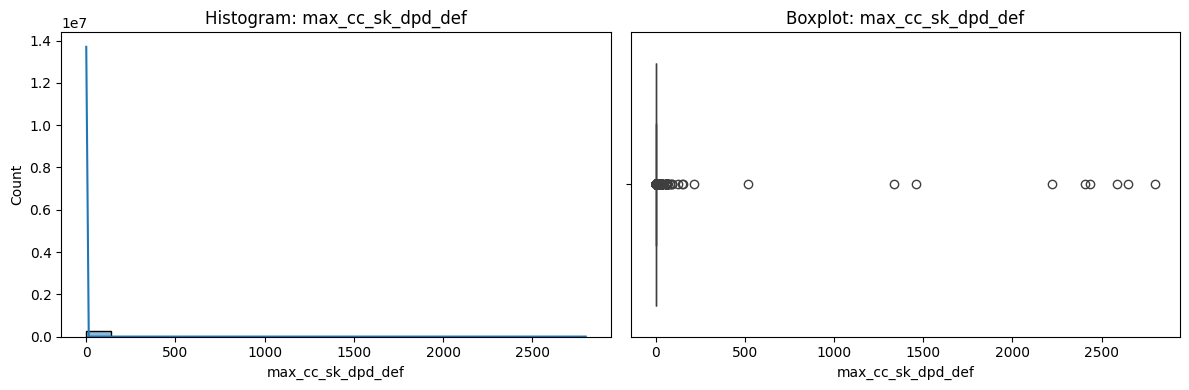

In [ ]:
for col in part4:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

univarte_plots Categorical

In [20]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

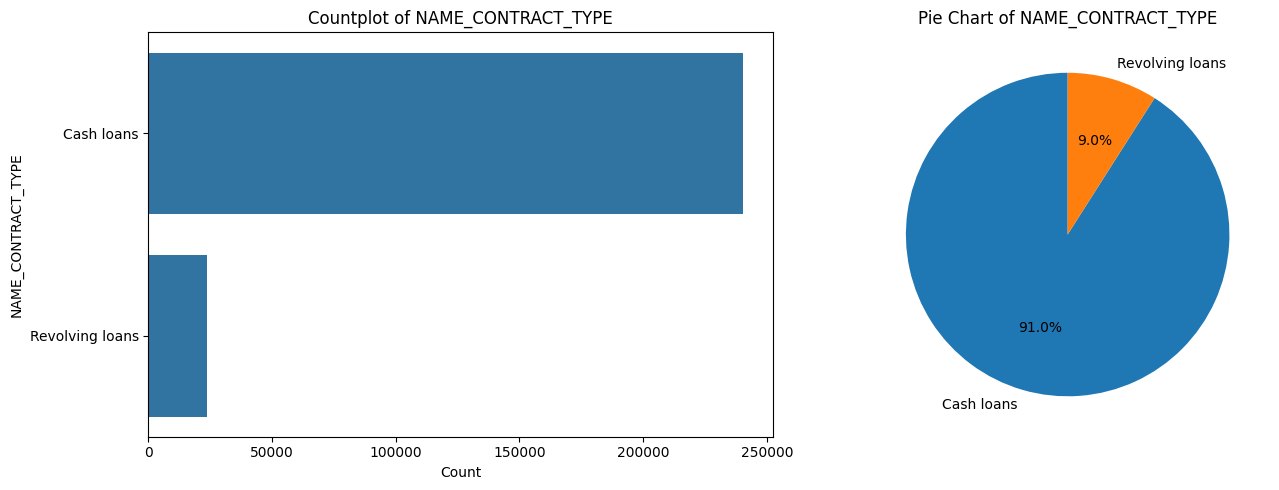

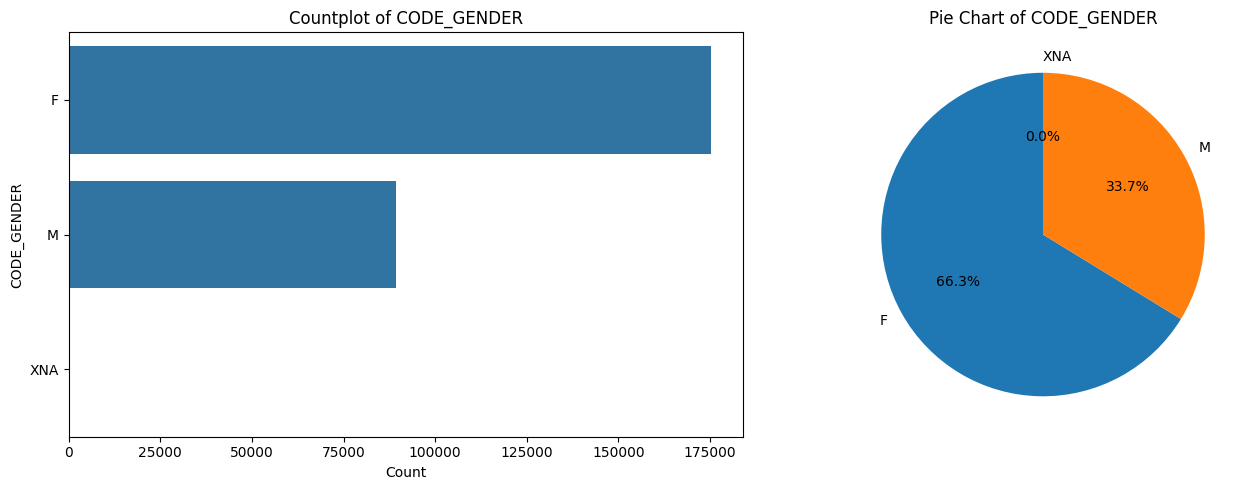

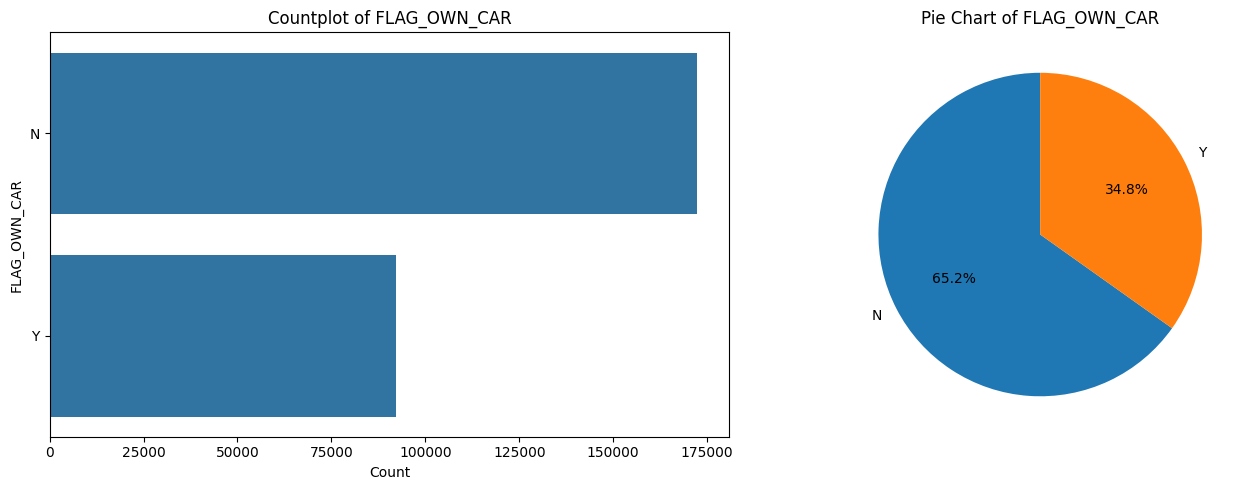

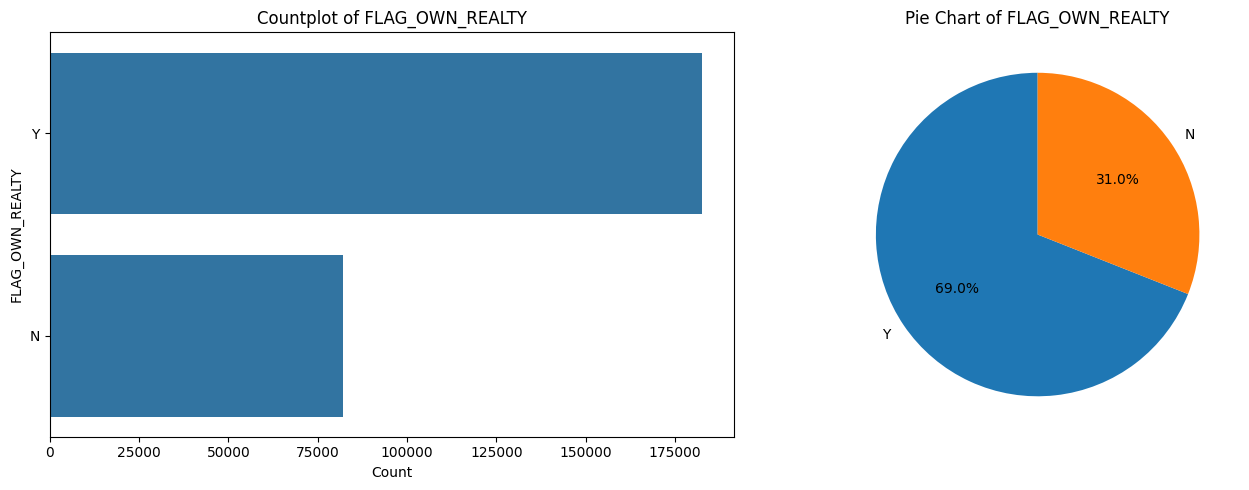

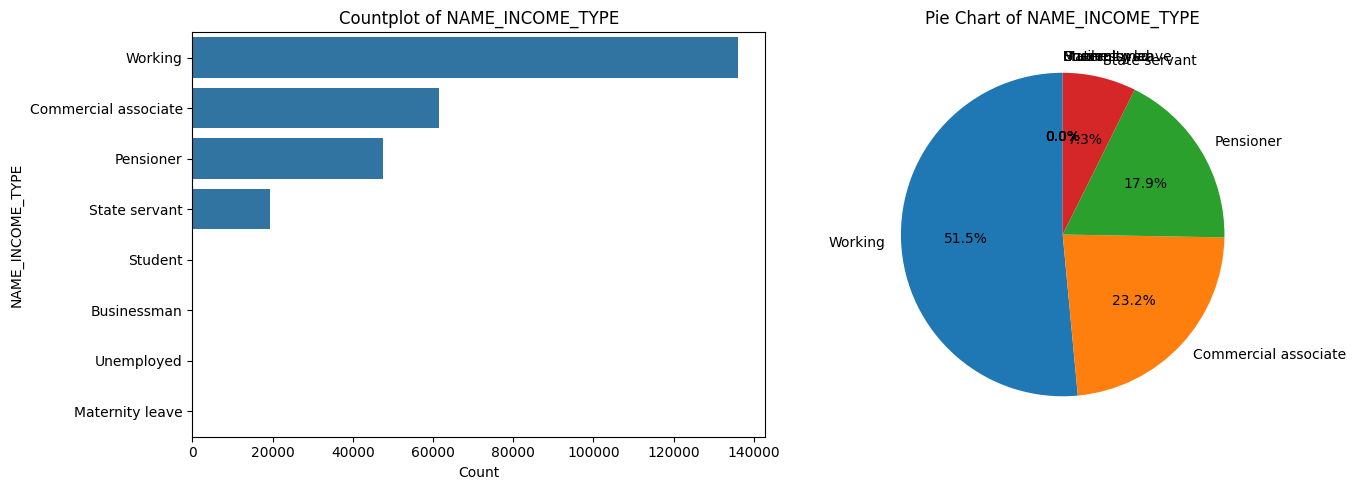

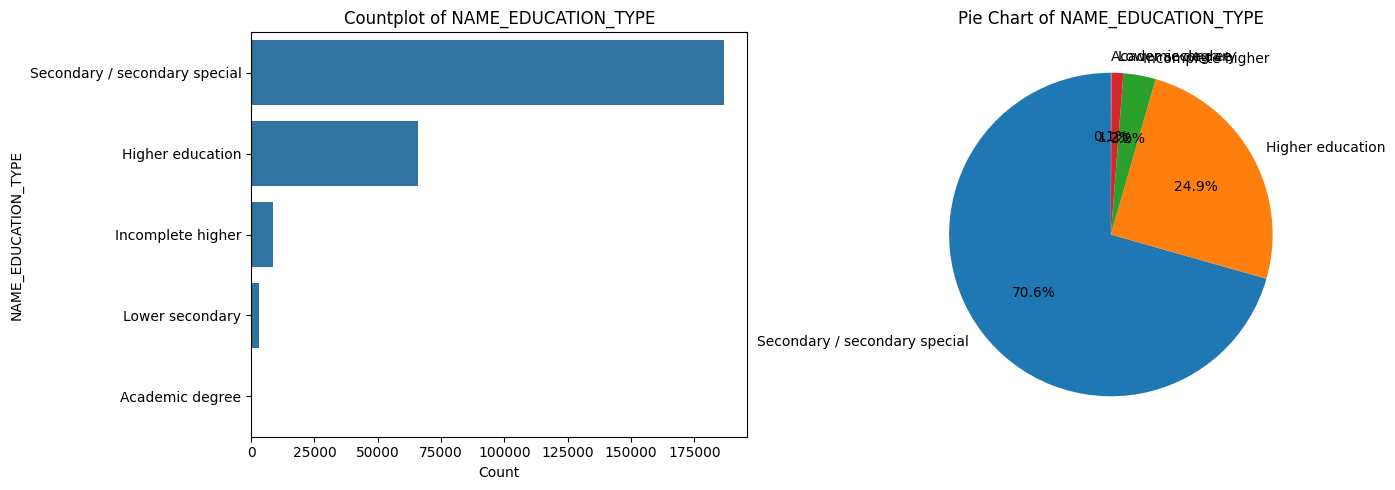

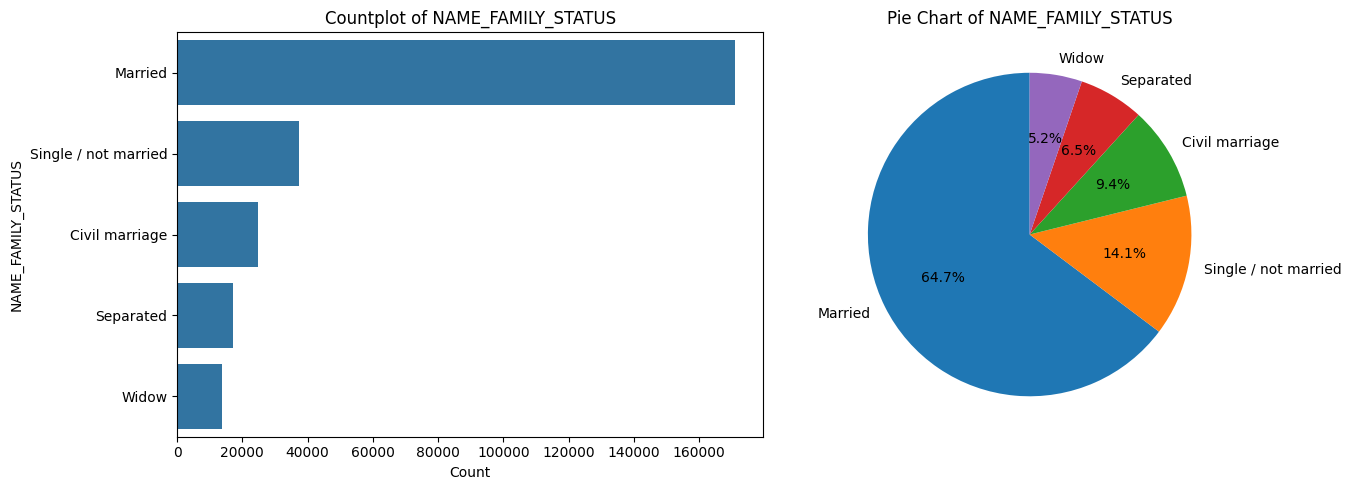

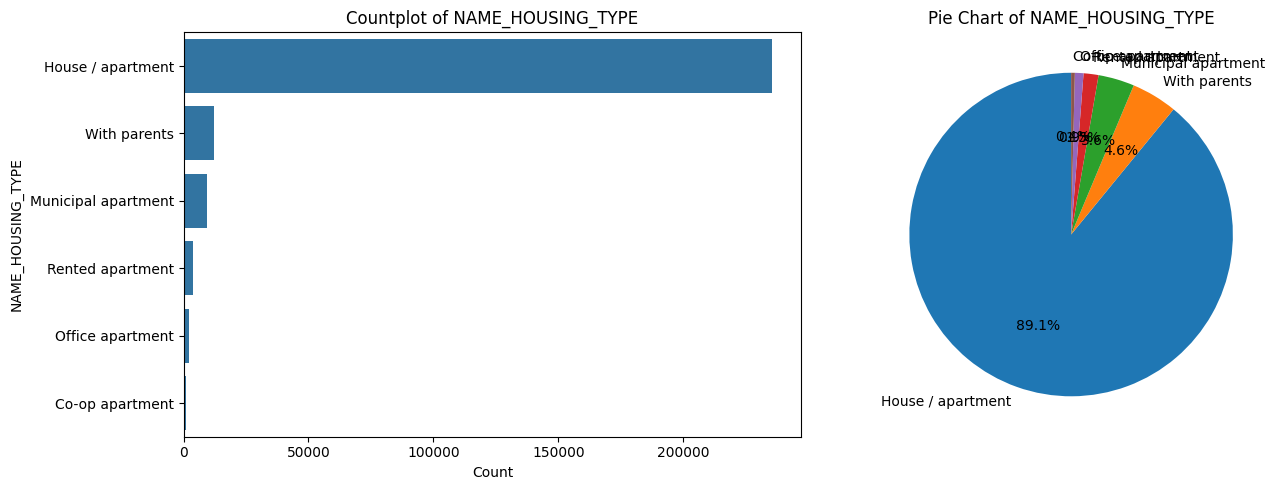

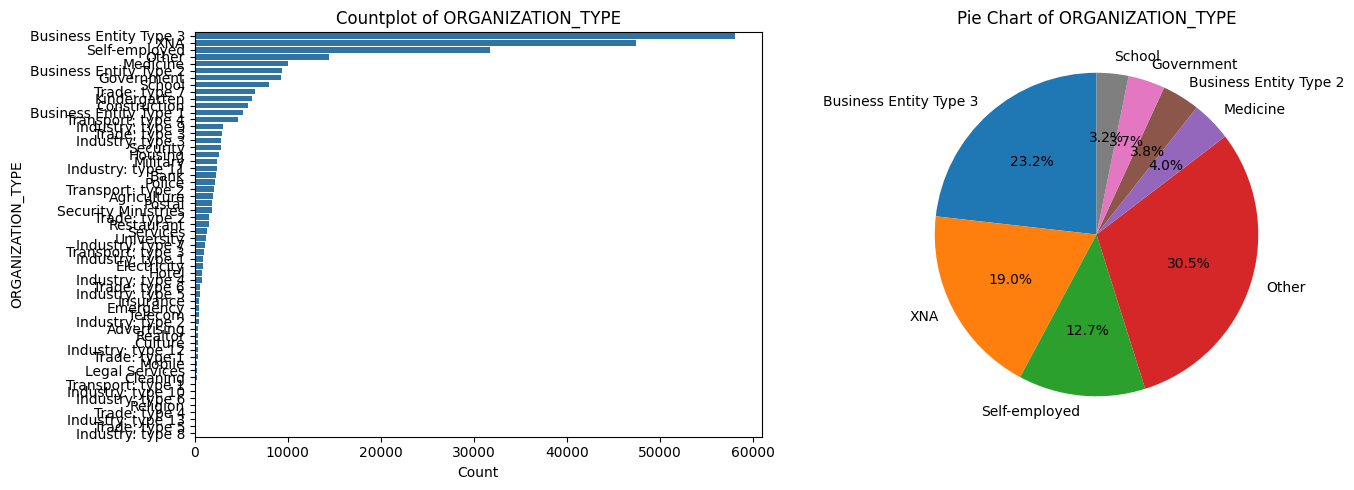

In [ ]:
for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Countplot
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index,
        ax=axes[0]
    )
    axes[0].set_title(f'Countplot of {col}')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel(col)

    #  Pie chart (top 8 categories only) 
    value_counts = df[col].value_counts()
    top_n = 8
    pie_data = value_counts[:top_n]
    if len(value_counts) > top_n:
        pie_data['Other'] = value_counts[top_n:].sum()

    axes[1].pie(
        pie_data,
        labels=pie_data.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

Multivariate Analysis

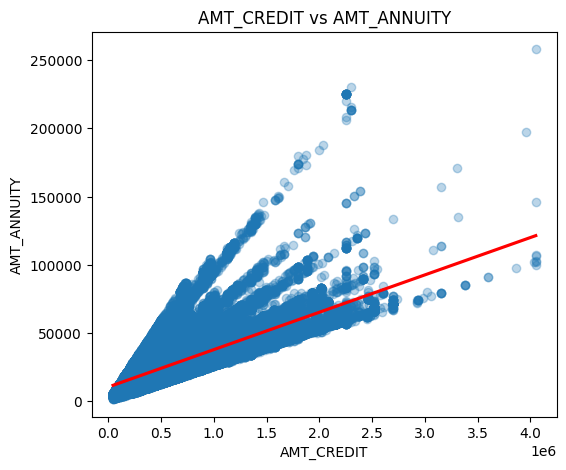

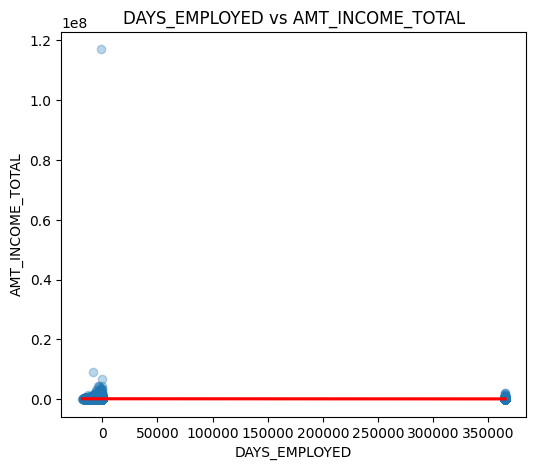

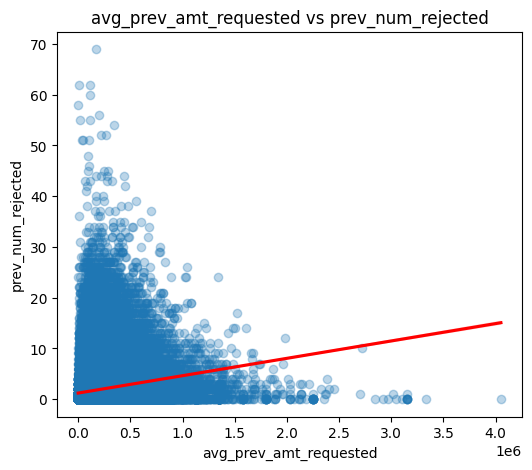

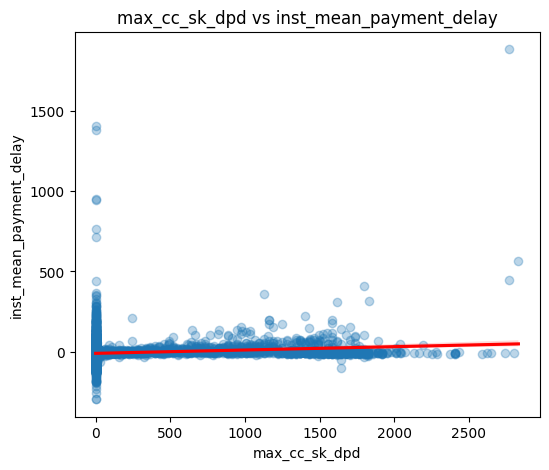

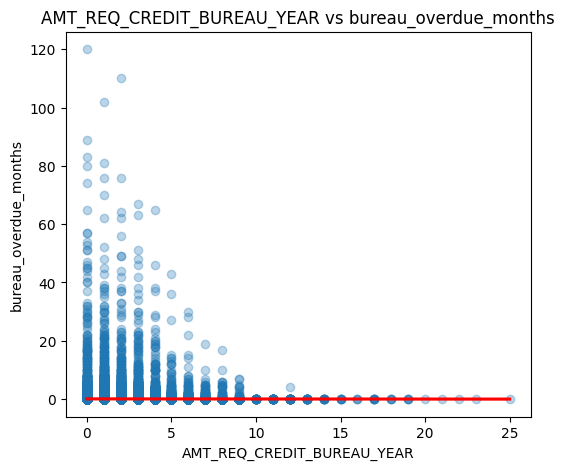

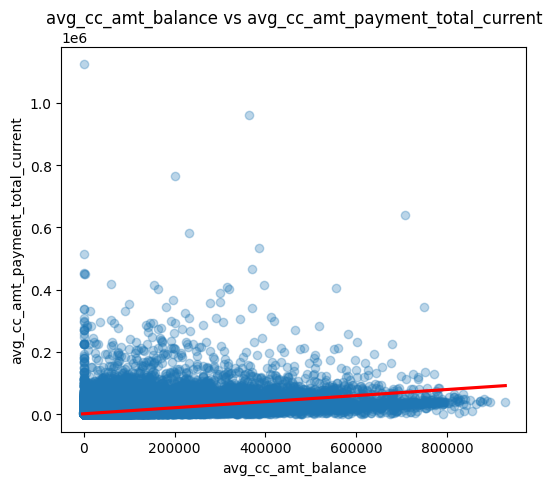

In [24]:
num_num_pairs = [
    ('AMT_CREDIT', 'AMT_ANNUITY'),
    ('DAYS_EMPLOYED', 'AMT_INCOME_TOTAL'),
    ('avg_prev_amt_requested', 'prev_num_rejected'),
    ('max_cc_sk_dpd', 'inst_mean_payment_delay'),
    ('AMT_REQ_CREDIT_BUREAU_YEAR', 'bureau_overdue_months'),
    ('avg_cc_amt_balance', 'avg_cc_amt_payment_total_current')
]

for x, y in num_num_pairs:
    plt.figure(figsize=(6, 5))
    sns.regplot(
        x=df[x],
        y=df[y],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    plt.title(f'{x} vs {y}')
    plt.show()

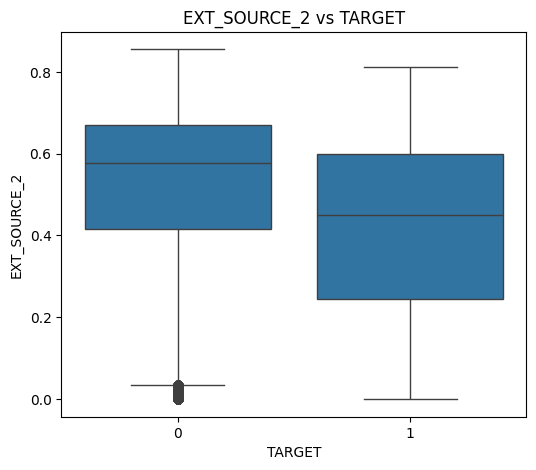

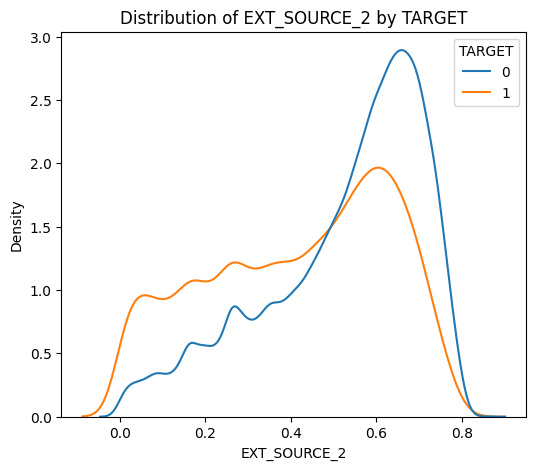

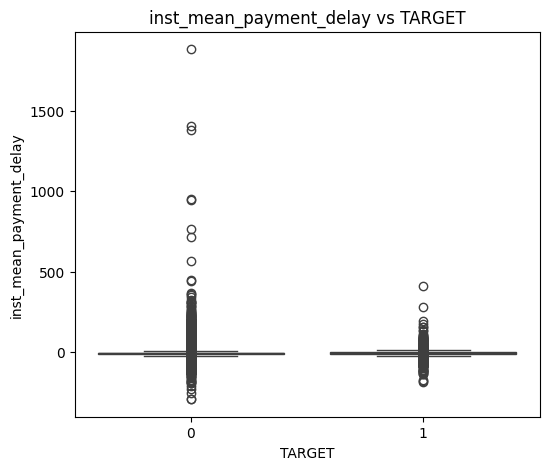

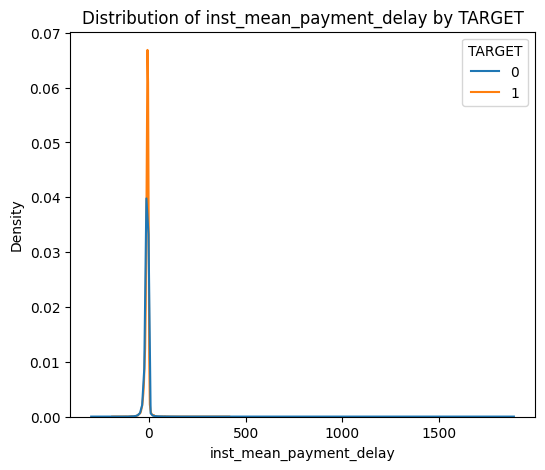

In [25]:
num_target_pairs = [
    'EXT_SOURCE_2',
    'inst_mean_payment_delay'
]

for col in num_target_pairs:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='TARGET', y=col, data=df)
    plt.title(f'{col} vs TARGET')
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False)
    plt.title(f'Distribution of {col} by TARGET')
    plt.show()

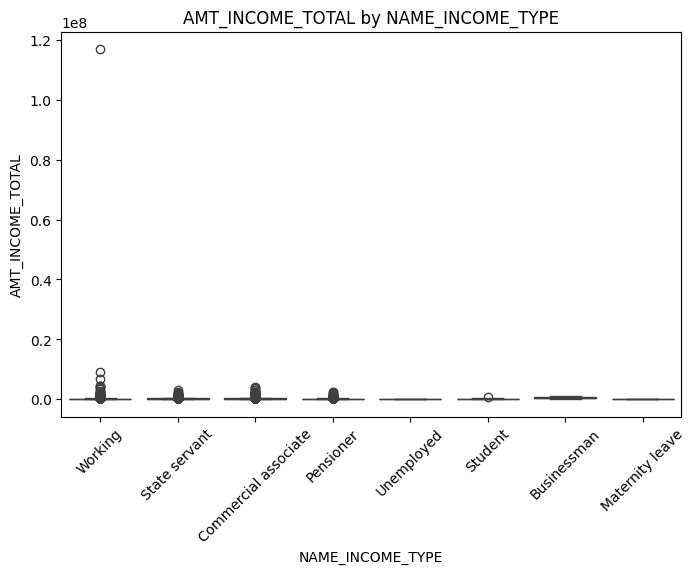

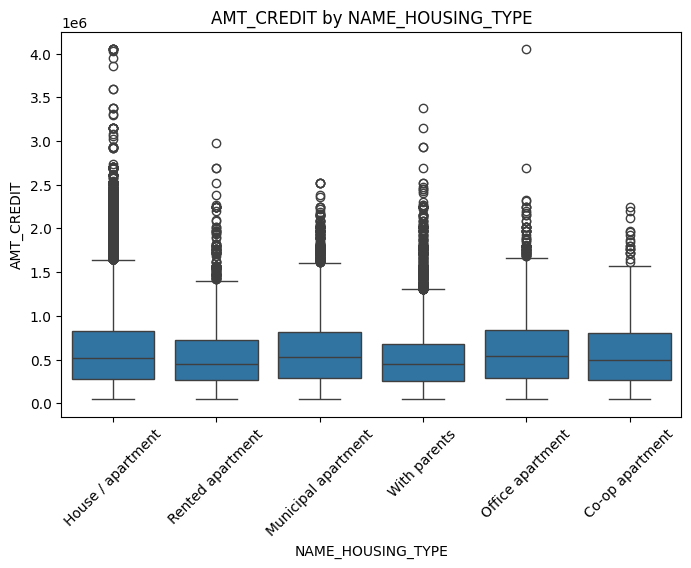

In [26]:
cat_num_pairs = [
    ('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL'),
    ('NAME_HOUSING_TYPE', 'AMT_CREDIT')
]

for cat, num in cat_num_pairs:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat, y=num, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{num} by {cat}')
    plt.show()


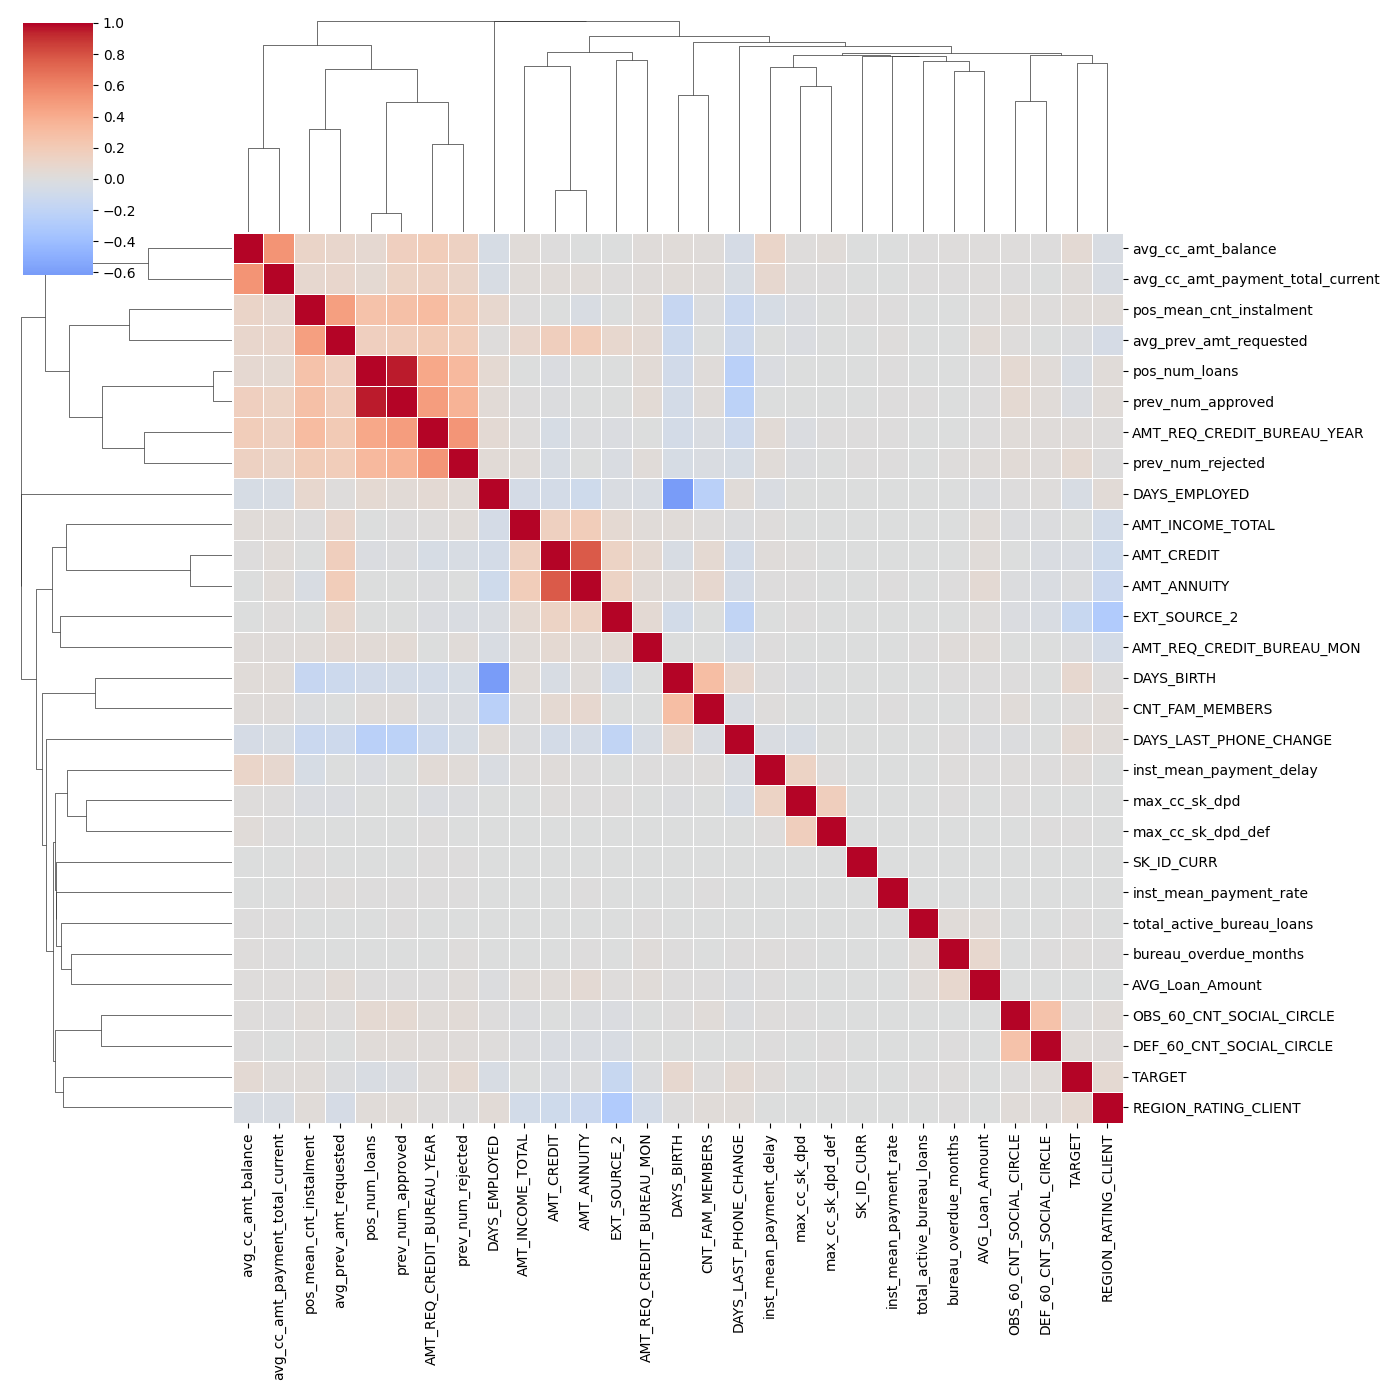

In [14]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr = num_df.corr()

sns.clustermap(
    corr,
    cmap='coolwarm',
    center=0,
    figsize=(14, 14),
    linewidths=0.5
)

plt.show()

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df.drop(columns=['SK_ID_CURR', 'TARGET'], errors='ignore'))

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.11389515 0.07819211]
Total variance explained: 0.19208726650287145


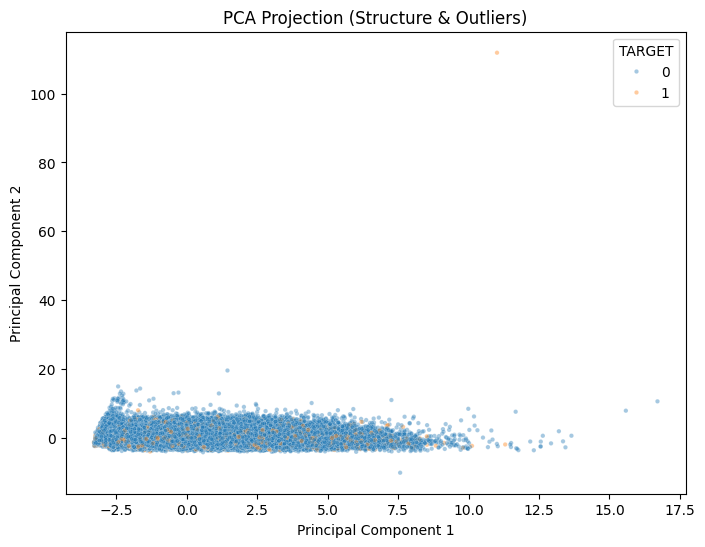

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['TARGET'],
    alpha=0.4,
    s=10
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Structure & Outliers)')
plt.show()
